In [2]:

import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt
from collections import Counter
import os
import re
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt


In [3]:
#Set working directory
#os.chdir( 'D:/projects/Sara Marcos' )    #.... changing directory
os.chdir( '/Users/Sara/Desktop/PythonProj/Facebook_py' ) 


In [4]:
#facebook data read

#Load data
facebook = pd.read_excel('RawData/Facebook.xlsx')

In [5]:
#view the dataset
#facebook.head()

In [6]:
#Extact the posts from the dataset
post_vec = facebook['Post Message']

In [7]:
#Converting the encoding to ASCII
for p in post_vec:
    #p.decode('utf-8','ignore')
    p.encode('ASCII','ignore').decode('ASCII','ignore')
    

In [8]:
#replace function for removing specific words.
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

In [9]:
#Dictionary of words that are to be removed
univPatterns = {'Univision':'', 'compartio':'', 'via':'', 'shared':'','video':'', 'foto':'','¿':'', '?':''}


In [10]:
#Replacing the words in the posts.
import re
for pat in univPatterns:
    for p in range(0,len(post_vec)):
        post_vec[p]=replace_all(post_vec[p],univPatterns)
        
        

/Users/Sara/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
post_vec


0      Sabes algo Hoy tenemos a todo el elenco de #El...
1      Estas son las s que compartió en sus redes, de...
2                                 Así reaccionó Belinda.
3      La mujer sobrevivió tras refugiarse en los esc...
4      "Soy vanidosa y sí quiero volver a sentirme be...
5      En El Chapo, las batallas han cobrado dos dolo...
6                                         Fue o no penal
7      Piden a Paul Ryan que someta a votación en el ...
8      Antes de morir dejó un críptico mensaje en sus...
9      Así fue el primer programa de Aquí y Ahora, co...
10     Eduardo Santamarina oficial grababa una escena...
11     José aseguró que las autoridades migratorias l...
12     Tierna grafía compartió Geraldine con sus hija...
13     La alerta implica no aproximarse a una distanc...
14     "Sil y yo nos queremos mucho", respondió Adria...
15     Andrea Legarreta compartió este #TBT con su es...
16     Su esperado disco ya está aquí y se llama 'Vic...
17     El domingo llega la fina

In [12]:
#Tokenizing the text and removing stopwords.
import nltk
import nltk.corpus
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('spanish')

sentence_re = r'''(?x)
        #abbreviations
        ([A-Z])(\.[A-Z])+\.?
        #words with optional internal hyphens
        | \w+(-\w+)*
        #currency and percentages
        | \$?\d+(\d+)?%?
        #separate tokens
        | [.,;"'?():-_`=|/]+
        '''

def tokenize_text(input_string):
        #tokenize with sensitivity towards regular expressions
        tokens = nltk.regexp_tokenize(input_string, sentence_re)
        #remove all stopwords
        sans_stopwords = [w for w in tokens if w.lower() not in stopwords]
        #preserve words in all caps
        content = [w.lower() if w.isupper() != True else w for w in sans_stopwords]

        return content

[nltk_data] Downloading package stopwords to /Users/Sara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
#Counting the no. of words present in the Text
from sklearn.feature_extraction.text import CountVectorizer

# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(post_vec)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(post_vec)


{'sabes': 1971, 'algo': 118, 'hoy': 1130, 'tenemos': 2132, 'todo': 2166, 'el': 756, 'elenco': 762, 'de': 602, 'elchapotv': 758, 'en': 777, 'elchapoilimitado': 757, 'te': 2117, 'encantará': 781, 'ya': 2324, 'estamos': 866, 'vivo': 2293, 'lo': 1309, 'que': 1828, 'viene': 2272, 'está': 884, 'mejor': 1399, 'nunca': 1576, 'presentado': 1762, 'por': 1738, 'at': 220, 'latino': 1267, 'estas': 872, 'son': 2061, 'las': 1265, 'compartió': 463, 'sus': 2098, 'redes': 1886, 'descanse': 650, 'paz': 1659, 'así': 219, 'reaccionó': 1852, 'belinda': 267, 'la': 1253, 'mujer': 1494, 'sobrevivió': 2049, 'tras': 2191, 'refugiarse': 1890, 'los': 1322, 'escombros': 824, 'un': 2212, 'árbol': 2338, 'quemado': 1833, 'tomando': 2170, 'agua': 97, 'charco': 399, 'lodo': 1312, 'soy': 2077, 'vanidosa': 2238, 'sí': 2102, 'quiero': 1840, 'volver': 2300, 'sentirme': 2010, 'bella': 268, 'dijo': 686, 'alicia': 123, 'machado': 1346, 'cómo': 588, 'ves': 2262, 'chapo': 398, 'batallas': 260, 'han': 1079, 'cobrado': 433, 'dos':

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


In [15]:
#Converting the Text to idf vector.
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(post_vec)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform(post_vec)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())


{'sabes': 1971, 'algo': 118, 'hoy': 1130, 'tenemos': 2132, 'todo': 2166, 'el': 756, 'elenco': 762, 'de': 602, 'elchapotv': 758, 'en': 777, 'elchapoilimitado': 757, 'te': 2117, 'encantará': 781, 'ya': 2324, 'estamos': 866, 'vivo': 2293, 'lo': 1309, 'que': 1828, 'viene': 2272, 'está': 884, 'mejor': 1399, 'nunca': 1576, 'presentado': 1762, 'por': 1738, 'at': 220, 'latino': 1267, 'estas': 872, 'son': 2061, 'las': 1265, 'compartió': 463, 'sus': 2098, 'redes': 1886, 'descanse': 650, 'paz': 1659, 'así': 219, 'reaccionó': 1852, 'belinda': 267, 'la': 1253, 'mujer': 1494, 'sobrevivió': 2049, 'tras': 2191, 'refugiarse': 1890, 'los': 1322, 'escombros': 824, 'un': 2212, 'árbol': 2338, 'quemado': 1833, 'tomando': 2170, 'agua': 97, 'charco': 399, 'lodo': 1312, 'soy': 2077, 'vanidosa': 2238, 'sí': 2102, 'quiero': 1840, 'volver': 2300, 'sentirme': 2010, 'bella': 268, 'dijo': 686, 'alicia': 123, 'machado': 1346, 'cómo': 588, 'ves': 2262, 'chapo': 398, 'batallas': 260, 'han': 1079, 'cobrado': 433, 'dos':

In [16]:
#Tokenizing by the nltk package.

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

results=[]
for p in post_vec:
    tokenizer = RegexpTokenizer(r'\w+')
    intermediate = tokenizer.tokenize(p)
    stop = stopwords.words('spanish')
    intermediate = [i for i in intermediate if i not in stop]
    results.append(intermediate)

In [17]:
results

[['Sabes',
  'Hoy',
  'elenco',
  'ElChapoTV',
  'ElChapoIlimitado',
  'encantará',
  'YA',
  'ESTAMOS',
  'EN',
  'VIVO',
  'viene',
  'mejor',
  'nunca',
  'presentado',
  'AT',
  'T',
  'Latino'],
 ['Estas', 's', 'compartió', 'redes', 'descanse', 'paz'],
 ['Así', 'reaccionó', 'Belinda'],
 ['La',
  'mujer',
  'sobrevivió',
  'tras',
  'refugiarse',
  'escombros',
  'árbol',
  'quemado',
  'tomando',
  'agua',
  'charco',
  'lodo'],
 ['Soy',
  'vanidosa',
  'quiero',
  'volver',
  'sentirme',
  'bella',
  'dijo',
  'Alicia',
  'Machado',
  'cómo',
  'ves'],
 ['En',
  'El',
  'Chapo',
  'batallas',
  'cobrado',
  'dos',
  'dolorosas',
  'facturas',
  'Joaquín',
  'Guzmán',
  'ElChapoTV'],
 ['Fue', 'penal'],
 ['Piden',
  'Paul',
  'Ryan',
  'someta',
  'votación',
  'pleno',
  'proyecto',
  'ley',
  'otorgue',
  'estatus',
  'legal',
  'dreamers'],
 ['Antes', 'morir', 'dejó', 'críptico', 'mensaje', 'redes', 'sociales'],
 ['Así',
  'primer',
  'programa',
  'Aquí',
  'Ahora',
  'Teresa',

In [18]:
#package for building LDA model.
from gensim import corpora, models, utils


In [19]:
#Creating the dictionary of words
dictionary = corpora.Dictionary(results)
corpus = [dictionary.doc2bow(description) for description in results]


In [20]:
#Changing the LDA model for using the result for KMeans clustering
class MyLdaModel(models.ldamodel.LdaModel):
    def __getitem__(self, bow, eps=0.01):
        is_corpus, corpus = utils.is_corpus(bow)
        if is_corpus:
            return self._apply(corpus)

        gamma, _ = self.inference([bow])
        topic_dist = gamma[0] / sum(gamma[0]) # normalize to proper distribution
        return [topicvalue for topicid, topicvalue in enumerate(topic_dist)]

In [21]:
#Defining the no. of topics and building the LDA model.
num_topics = 5
lda = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=5)
model_lda = MyLdaModel(corpus, id2word=dictionary, num_topics=num_topics)
doc_lda = lda[corpus]

In [22]:
#Assigning the topic to each post.
l1=[]
for doc in doc_lda:
    n=0
    for i in range (0,len(doc)):
        if(n < doc[i][1]):
            n,l=doc[i][1],doc[i][0]
    print(l)
    l1.append(l)
 
        

2
3
4
4
4
2
0
1
1
4
1
4
2
2
0
2
0
2
2
4
0
2
3
2
0
3
2
2
1
2
2
1
2
0
1
2
0
1
1
1
3
3
0
0
4
0
0
4
0
4
2
3
3
3
2
3
4
3
1
4
1
1
4
1
4
3
3
4
1
1
2
0
0
4
3
3
4
3
1
3
4
0
4
3
0
1
2
0
4
3
3
0
0
4
4
2
4
4
4
3
4
3
4
2
4
0
0
4
4
4
2
2
3
4
0
1
2
4
3
1
0
4
3
3
1
3
0
2
4
4
1
2
0
0
0
2
2
4
1
2
0
3
2
3
0
0
0
0
1
0
0
4
2
0
3
4
2
0
2
3
1
4
3
4
3
0
2
0
1
3
3
3
0
1
0
4
2
4
1
3
4
2
0
2
0
1
1
0
0
3
4
1
1
0
0
0
3
3
2
1
1
3
3
3
3
1
1
2
3
3
3
0
1
3
4
1
3
2
4
0
2
0
4
3
4
1
2
2
2
1
4
2
0
0
4
0
2
2
0
0
1
0
4
4
3
4
1
4
4
3
4
1
4
3
4
4
2
0
0
3
2
0
3
3
0
0
0
4
2
1
0
3
2
1
4
0
2
3
1
4
4
4
2
4
1
2
3
3
4
4
0
4
0
2
2
1
3
3
0
3
2
4
3
4
1
1
1
4
3
4
4
1
4
0
4
2
3
1
2
4
1
3
2
4
3
2
4
1
4
3
4
1
1
4
3
2
1
4
4
4
3
1
1
4
2
1
3
0
0
4
3
0
3
1
0
2
2
3
0
0
2
2
0
4
2
2
3
1
0
2
4
0
0
0
4
3
1
0
1
0
2
4
4
0
0
2
0
2
2
1
4
0
4
2
1
4
4
1
3
1
1
1
0
0
0
0
4
4
4
3
0
0
1
4
2
0
4
0
4
1
0
3
0
4
2
2
4
2
3
0
1
3
4
2
1
0
3
1
3
2
0
2
4
3
3
1
0
2
1
1
1
4
3
4
3
1
2
1
4
0
3
4
4
4
0
3
3
2
0
3
1
0
0
4
2
4
4
2
3
0
4
2
1
2
3
0
3
1
4
4
4
1
3
1
1
1
2
3
3
2


In [23]:
len(l1)

500

In [24]:
for doc in doc_lda:
        print(doc)

[(0, 0.011189104), (1, 0.011182691), (2, 0.95525914), (3, 0.011215007), (4, 0.011154044)]
[(0, 0.028817153), (1, 0.029071907), (2, 0.029123852), (3, 0.88431835), (4, 0.028668731)]
[(0, 0.05000676), (1, 0.05074996), (2, 0.050310165), (3, 0.39759073), (4, 0.45134243)]
[(0, 0.015907163), (1, 0.015457381), (2, 0.015431767), (3, 0.015426656), (4, 0.937777)]
[(0, 0.016987843), (1, 0.016779356), (2, 0.01668537), (3, 0.01670818), (4, 0.9328392)]
[(0, 0.016759962), (1, 0.016703324), (2, 0.93299156), (3, 0.016816603), (4, 0.016728537)]
[(0, 0.73328924), (1, 0.06667893), (2, 0.066677794), (3, 0.06667767), (4, 0.066676386)]
[(0, 0.015388014), (1, 0.9383236), (2, 0.015483454), (3, 0.015387421), (4, 0.015417486)]
[(0, 0.025307769), (1, 0.8987614), (2, 0.025145242), (3, 0.025450233), (4, 0.02533538)]
[(0, 0.014460041), (1, 0.014329943), (2, 0.01429932), (3, 0.014335092), (4, 0.9425756)]
[(0, 0.020037428), (1, 0.9193789), (2, 0.020319728), (3, 0.0201941), (4, 0.020069867)]
[(0, 0.0250475), (1, 0.02500

[(0, 0.02236914), (1, 0.022225793), (2, 0.022351958), (3, 0.91051453), (4, 0.02253861)]
[(0, 0.020172335), (1, 0.02007839), (2, 0.020154195), (3, 0.020046975), (4, 0.91954815)]
[(0, 0.022558374), (1, 0.02222676), (2, 0.022232112), (3, 0.91050977), (4, 0.022473)]
[(0, 0.88533753), (1, 0.028630996), (2, 0.028709402), (3, 0.028695121), (4, 0.02862689)]
[(0, 0.025098685), (1, 0.025148157), (2, 0.89931744), (3, 0.025042417), (4, 0.025393281)]
[(0, 0.8392499), (1, 0.040352717), (2, 0.04016702), (3, 0.040163446), (4, 0.040066898)]
[(0, 0.025016354), (1, 0.89986956), (2, 0.025004335), (3, 0.025017168), (4, 0.025092581)]
[(0, 0.016728839), (1, 0.016786102), (2, 0.016777618), (3, 0.93287224), (4, 0.016835252)]
[(0, 0.015517479), (1, 0.015533705), (2, 0.015510659), (3, 0.93792623), (4, 0.015511955)]
[(0, 0.025178855), (1, 0.02517342), (2, 0.025334638), (3, 0.89887136), (4, 0.025441699)]
[(0, 0.8844494), (1, 0.028683107), (2, 0.029153679), (3, 0.028649995), (4, 0.029063817)]
[(0, 0.050008662), (1,

[(0, 0.018247422), (1, 0.01820115), (2, 0.01823973), (3, 0.01820972), (4, 0.92710197)]
[(0, 0.025421808), (1, 0.025126655), (2, 0.89906234), (3, 0.025183028), (4, 0.025206232)]
[(0, 0.016795365), (1, 0.016820448), (2, 0.01681847), (3, 0.016774137), (4, 0.93279153)]
[(0, 0.033717364), (1, 0.86576533), (2, 0.033656318), (3, 0.033435557), (4, 0.033425402)]
[(0, 0.05018389), (1, 0.051369384), (2, 0.7976801), (3, 0.050439097), (4, 0.050327547)]
[(0, 0.015824018), (1, 0.015733665), (2, 0.01562537), (3, 0.93702155), (4, 0.015795378)]
[(0, 0.040005088), (1, 0.040005945), (2, 0.040082958), (3, 0.83974016), (4, 0.040165883)]
[(0, 0.025074648), (1, 0.025253292), (2, 0.025331467), (3, 0.02538698), (4, 0.8989536)]
[(0, 0.022386985), (1, 0.022447836), (2, 0.022370601), (3, 0.022332206), (4, 0.9104624)]
[(0, 0.86529946), (1, 0.033411276), (2, 0.03338495), (3, 0.034498286), (4, 0.033406075)]
[(0, 0.018255536), (1, 0.018216906), (2, 0.018310143), (3, 0.01821674), (4, 0.92700064)]
[(0, 0.86554176), (1, 

[(0, 0.02525489), (1, 0.025201391), (2, 0.025279727), (3, 0.02515643), (4, 0.8991076)]
[(0, 0.02523004), (1, 0.02505849), (2, 0.025235722), (3, 0.025096023), (4, 0.89937973)]
[(0, 0.02242307), (1, 0.022307718), (2, 0.022241415), (3, 0.022261491), (4, 0.9107663)]
[(0, 0.9187986), (1, 0.020467767), (2, 0.020276394), (3, 0.020263173), (4, 0.020193981)]
[(0, 0.022949051), (1, 0.022322597), (2, 0.022567544), (3, 0.9095989), (4, 0.02256189)]
[(0, 0.018515421), (1, 0.01828912), (2, 0.018530585), (3, 0.92602235), (4, 0.018642535)]
[(0, 0.015661363), (1, 0.015491176), (2, 0.9377332), (3, 0.015487824), (4, 0.015626434)]
[(0, 0.8997178), (1, 0.025015589), (2, 0.025033105), (3, 0.025003282), (4, 0.025230223)]
[(0, 0.016865568), (1, 0.01667232), (2, 0.017011097), (3, 0.9326098), (4, 0.016841229)]
[(0, 0.013449262), (1, 0.9462396), (2, 0.013469807), (3, 0.01337372), (4, 0.013467615)]
[(0, 0.8395076), (1, 0.040060937), (2, 0.040049057), (3, 0.040005147), (4, 0.040377248)]
[(0, 0.8655836), (1, 0.03341

In [25]:
#Adding the topics to the dataframe.
facebook['topics'] = l1

In [26]:
#Setting the threshold if required.
#That code gives us which post belongs to which topic.
#In this snippet we are getting the probability of a post belonging to which group.
from itertools import chain
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in doc_lda]]))
threshold = sum(scores)/len(scores)

In [27]:
#Printing the topics.
topics=[]
for t in lda.print_topics():
    print(t)

# Q - can this be in a dataframe table? it is hard to read

(0, '0.009*"cómo" + 0.009*"El" + 0.008*"Vía" + 0.008*"La" + 0.006*"Mira" + 0.004*"http" + 0.004*"compartió" + 0.004*"nunca" + 0.004*"Te" + 0.004*"quién"')
(1, '0.008*"compartió" + 0.007*"La" + 0.005*"El" + 0.005*"Ana" + 0.005*"Vía" + 0.004*"Los" + 0.004*"Quién" + 0.004*"así" + 0.004*"Harry" + 0.004*"momento"')
(2, '0.010*"El" + 0.009*"ElChapoTV" + 0.006*"La" + 0.006*"Vía" + 0.006*"compartió" + 0.006*"años" + 0.005*"America" + 0.005*"Despierta" + 0.004*"amor" + 0.004*"vida"')
(3, '0.007*"s" + 0.007*"historia" + 0.006*"El" + 0.005*"compartió" + 0.005*"La" + 0.005*"ser" + 0.005*"Vía" + 0.005*"America" + 0.005*"Despierta" + 0.004*"No"')
(4, '0.009*"El" + 0.007*"Vía" + 0.005*"La" + 0.005*"primera" + 0.004*"Así" + 0.004*"años" + 0.004*"cómo" + 0.004*"Te" + 0.004*"Aquí" + 0.003*"vez"')


In [28]:
import itertools
for l,t in zip(doc_lda,corpus):
    print(l,"#",t)

[(0, 0.011189092), (1, 0.011182714), (2, 0.95525867), (3, 0.011215468), (4, 0.011154046)] # [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]
[(0, 0.02881712), (1, 0.02907425), (2, 0.029113049), (3, 0.8843269), (4, 0.02866872)] # [(17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]
[(0, 0.050006755), (1, 0.050746586), (2, 0.050310165), (3, 0.39762273), (4, 0.45131376)] # [(23, 1), (24, 1), (25, 1)]
[(0, 0.015887817), (1, 0.015457371), (2, 0.015431762), (3, 0.015426652), (4, 0.93779635)] # [(26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)]
[(0, 0.01697775), (1, 0.016779339), (2, 0.016685368), (3, 0.016708175), (4, 0.9328494)] # [(38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)]
[(0, 0.016759949), (1, 0.016703324), (2, 0.9329913), (3, 0.016816856), (4, 0.016728537)] # [(4, 1), (49, 1), (5

[(0, 0.013454455), (1, 0.013368172), (2, 0.013373955), (3, 0.9464023), (4, 0.013401122)] # [(207, 1), (414, 1), (415, 1), (421, 1), (431, 1), (434, 1), (565, 1), (813, 1), (892, 1), (893, 1), (894, 1), (895, 1), (896, 1), (897, 1)]
[(0, 0.9265473), (1, 0.018327616), (2, 0.018494602), (3, 0.018238805), (4, 0.018391682)] # [(50, 1), (241, 1), (302, 1), (305, 1), (847, 1), (898, 1), (899, 1), (900, 1), (901, 1), (902, 1)]
[(0, 0.8666427), (1, 0.033340015), (2, 0.033339363), (3, 0.03333922), (4, 0.033338655)] # [(59, 1), (903, 1), (904, 1), (905, 1), (906, 1)]
[(0, 0.9380303), (1, 0.015427319), (2, 0.015493755), (3, 0.015401839), (4, 0.015646793)] # [(42, 1), (47, 1), (83, 1), (87, 1), (139, 1), (731, 1), (907, 1), (908, 1), (909, 1), (910, 1), (911, 1), (912, 1)]
[(0, 0.9329993), (1, 0.016729696), (2, 0.016700188), (3, 0.01669124), (4, 0.016879596)] # [(243, 1), (540, 1), (541, 1), (913, 1), (914, 1), (915, 1), (916, 1), (917, 1), (918, 1), (919, 1), (920, 1)]
[(0, 0.03485329), (1, 0.8643

[(0, 0.02519886), (1, 0.025256874), (2, 0.025121508), (3, 0.025200782), (4, 0.89922196)] # [(26, 1), (484, 1), (895, 1), (1648, 1), (1649, 1), (1650, 1), (1651, 1)]
[(0, 0.016860921), (1, 0.9328143), (2, 0.016694533), (3, 0.016777126), (4, 0.016853126)] # [(482, 1), (532, 1), (844, 1), (871, 1), (1288, 1), (1652, 1), (1653, 1), (1654, 1), (1655, 1), (1656, 1), (1657, 1)]
[(4, 0.9615186)] # [(36, 1), (42, 1), (243, 1), (446, 1), (448, 1), (532, 1), (618, 1), (717, 1), (1479, 1), (1616, 2), (1658, 1), (1659, 1), (1660, 1), (1661, 1), (1662, 1), (1663, 1), (1664, 1), (1665, 1), (1666, 1)]
[(0, 0.9094602), (1, 0.0225307), (2, 0.022401348), (3, 0.02263845), (4, 0.022969287)] # [(580, 1), (610, 1), (1225, 1), (1667, 1), (1668, 1), (1669, 1), (1670, 1), (1671, 1)]
[(0, 0.028635794), (1, 0.028621355), (2, 0.02870589), (3, 0.028798612), (4, 0.88523835)] # [(75, 1), (781, 1), (1580, 1), (1672, 1), (1673, 1), (1674, 1)]
[(0, 0.028894898), (1, 0.028781503), (2, 0.8843492), (3, 0.028627453), (4, 0.

[(0, 0.83963), (1, 0.04005773), (2, 0.040005498), (3, 0.04030199), (4, 0.040004805)] # [(736, 1), (780, 1), (1301, 1), (1829, 1)]
[(0, 0.0106553575), (1, 0.010688661), (2, 0.9572158), (3, 0.010690383), (4, 0.010749848)] # [(50, 1), (446, 1), (482, 1), (485, 1), (536, 1), (609, 1), (1021, 1), (1406, 1), (1551, 1), (1830, 1), (1831, 1), (1832, 1), (1833, 1), (1834, 1), (1835, 1), (1836, 1), (1837, 1), (1838, 1)]
[(0, 0.016695134), (1, 0.016703561), (2, 0.93315697), (3, 0.01676033), (4, 0.016684012)] # [(181, 1), (272, 1), (1701, 1), (1839, 1), (1840, 1), (1841, 1), (1842, 1), (1843, 1), (1844, 1), (1845, 1), (1846, 1)]
[(0, 0.93277407), (1, 0.016669938), (2, 0.016746538), (3, 0.016788458), (4, 0.017020991)] # [(124, 1), (414, 1), (456, 1), (557, 1), (744, 1), (1214, 1), (1847, 1), (1848, 1), (1849, 1), (1850, 1), (1851, 1)]
[(0, 0.014360543), (1, 0.014388406), (2, 0.0143288635), (3, 0.014536304), (4, 0.94238585)] # [(478, 1), (565, 1), (1169, 1), (1484, 1), (1542, 1), (1852, 1), (1853, 1

In [29]:
topics

[]

In [30]:
#Changing the format to datetime format.
facebook['Posted']=pd.to_datetime(facebook['Posted'])

In [31]:
#Getting the hour from the posted column.
facebook['hourf'] = facebook['Posted'].dt.hour

In [32]:
#Getting the day of the week from posted column.
facebook['weekday'] = facebook['Posted'].dt.dayofweek

In [33]:
#Creating the column Uni in facebook dataset.
facebook['Uni'] = facebook['Lifetime Post organic reach'] + facebook['Lifetime Post Paid Reach']

In [34]:
#Grouping the dataset by type.
typeviews = facebook.groupby(['Type'])
print(typeviews)
facebook['Lifetime Engaged Users']

0      12987
1      12411
2       1337
3      22155
4       3150
5        155
6        338
7       1485
8       4806
9       2006
10       430
11      1378
12      8083
13      1426
14       714
15     20417
16       829
17       567
18      1779
19     10908
20     38017
21      1507
22      2859
23      3108
24       576
25       343
26       486
27      5481
28       260
29       202
       ...  
470     1078
471     8962
472      433
473      979
474     1086
475      854
476      420
477      438
478    28306
479    85251
480     6122
481     1995
482    23854
483     4451
484      953
485    29230
486     3815
487      413
488     3808
489     7388
490     9155
491     2685
492     8708
493     4315
494     1503
495     3164
496      990
497    23191
498     5263
499     8801
Name: Lifetime Engaged Users, Length: 500, dtype: int64

In [35]:
#Finding the means
typeviews1 = typeviews['Uni'].mean()

In [36]:
typeshates = typeviews['Lifetime Negative Feedback from Users'].mean()

In [37]:
typesclick= typeviews['Lifetime Post Consumers'].mean()

In [38]:
typesengage = typeviews['Lifetime Engaged Users'].mean()

In [39]:
typeviews1=typeviews1.sort_values(ascending=False)

In [40]:
typeviews1
#round to 2 decimals and add %

Type
Video          462269.472727
SharedVideo    144761.083333
Photo          137790.217949
Link           126688.612245
Name: Uni, dtype: float64

In [41]:
typeviews1.astype(int)

Type
Video          462269
SharedVideo    144761
Photo          137790
Link           126688
Name: Uni, dtype: int64

In [43]:
typeviews_per = (typeviews1/sum(typeviews1))*100
typeviews_per

Type
Video          53.042397
SharedVideo    16.610387
Photo          15.810526
Link           14.536689
Name: Uni, dtype: float64

In [46]:
typeviews2 = pd.concat([typeviews1,typeviews_per], axis=1)
typeviews2.columns = ['Value','Percentage']
print(typeviews2)

typeviews2.to_csv('cleandata/out.csv')

                     Value  Percentage
Type                                  
Video        462269.472727   53.042397
SharedVideo  144761.083333   16.610387
Photo        137790.217949   15.810526
Link         126688.612245   14.536689


In [47]:
#importing the packages for plotting.
import matplotlib.pyplot as plt
import numpy as np
typeviews1.values

array([462269.47272727, 144761.08333333, 137790.21794872, 126688.6122449 ])

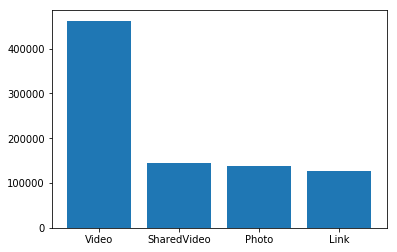

In [48]:
#Plot the Views according to the type.
plt.bar(np.arange(len(typeviews1)),typeviews1.values)
plt.xticks(np.arange(len(typeviews1)), typeviews1.index)
plt.show()

In [49]:
#Grouping by topics.
topicviews = facebook.groupby(['topics'])
facebook['Lifetime Engaged Users']

0      12987
1      12411
2       1337
3      22155
4       3150
5        155
6        338
7       1485
8       4806
9       2006
10       430
11      1378
12      8083
13      1426
14       714
15     20417
16       829
17       567
18      1779
19     10908
20     38017
21      1507
22      2859
23      3108
24       576
25       343
26       486
27      5481
28       260
29       202
       ...  
470     1078
471     8962
472      433
473      979
474     1086
475      854
476      420
477      438
478    28306
479    85251
480     6122
481     1995
482    23854
483     4451
484      953
485    29230
486     3815
487      413
488     3808
489     7388
490     9155
491     2685
492     8708
493     4315
494     1503
495     3164
496      990
497    23191
498     5263
499     8801
Name: Lifetime Engaged Users, Length: 500, dtype: int64

In [50]:
#Mean of the views by topic.
topicviews1 = topicviews['Uni'].mean()
topicviews1


topics
0    190386.349057
1    145322.568182
2    144858.197802
3    165355.340206
4    177203.516949
Name: Uni, dtype: float64

In [51]:
topichates = topicviews['Lifetime Negative Feedback from Users'].mean()

In [52]:
topiclicks = topicviews['Lifetime Post Consumers'].mean()

In [53]:
topicengaged = topicviews['Lifetime Engaged Users'].mean()

In [54]:
topicviews1=topicviews1.sort_values(ascending=False)

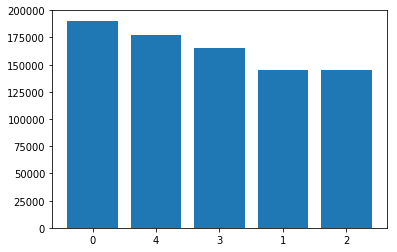

In [55]:
#Plotting the views on the basis of topics.
plt.bar(np.arange(len(topicviews1)),topicviews1.values)
plt.xticks(np.arange(len(topicviews1)), topicviews1.index)
plt.show()

In [56]:
#Sorting the hates on the basis of type.
typeshates=typeshates.sort_values(ascending=False)

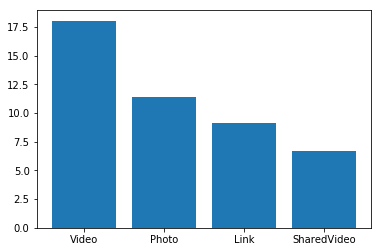

In [57]:
#Plotting the no. of hates on the basis of the types.
plt.bar(np.arange(len(typeshates)),typeshates.values)
plt.xticks(np.arange(len(typeshates)), typeshates.index)
plt.show()

In [58]:
#Sort on the basis of no. clicks
typesclick=typesclick.sort_values(ascending=False)

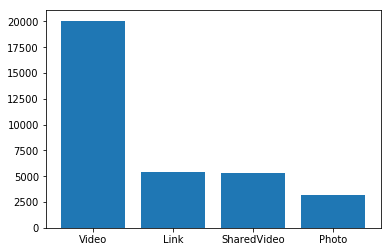

In [59]:
#Plotting the no. of clicks.
plt.bar(np.arange(len(typesclick)),typesclick.values)
plt.xticks(np.arange(len(typesclick)), typesclick.index)
plt.show()

In [60]:
typesengage=typesengage.sort_values(ascending=False)

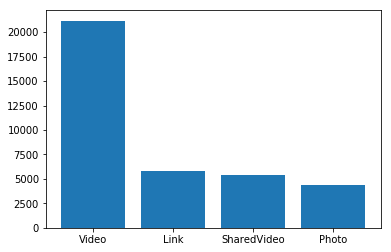

In [61]:
plt.bar(np.arange(len(typesengage)),typesengage.values)
plt.xticks(np.arange(len(typesengage)), typesengage.index)
plt.show()

In [62]:
topicengaged = topicengaged.sort_values(ascending=False)

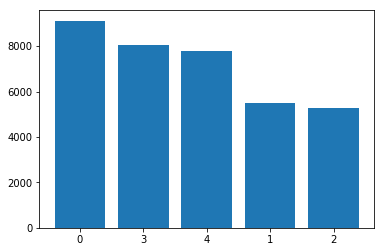

In [63]:
plt.bar(np.arange(len(topicengaged)),topicengaged.values)
plt.xticks(np.arange(len(topicengaged)), topicengaged.index)
plt.show()

In [64]:
#Calculating the ratios
facebook['negative_ratio'] = facebook['Lifetime Negative Feedback from Users']/facebook['Uni']

In [65]:
facebook['engage_ratio'] = facebook['Lifetime Engaged Users']/facebook['Uni']

In [66]:
facebook['click_ratio'] = facebook['Lifetime Post Consumers']/facebook['Uni']

In [67]:
typen= facebook.groupby(['Type'])

In [68]:
hatesratio = typen['negative_ratio'].mean()
 
hatesratio

hatesratio = pd.DataFrame({'Type': hatesratio.index,'Value' : hatesratio.values, 'Ratio' :'Negative Ratio'})

In [69]:
engageratio = typen['engage_ratio'].mean()

In [70]:
engageratio = pd.DataFrame({'Type':engageratio.index,'Value' : engageratio.values, 'Ratio' :'Engage Ratio'})

In [71]:
clickratio = typen['click_ratio'].mean()
clickratio = pd.DataFrame({'Type':clickratio.index,'Value' : clickratio.values, 'Ratio' :'Click Ratio'})

In [72]:
frames = [hatesratio,engageratio,clickratio]
ratios = pd.concat(frames)
print(ratios)

            Ratio         Type     Value
0  Negative Ratio         Link  0.000079
1  Negative Ratio        Photo  0.000080
2  Negative Ratio  SharedVideo  0.000046
3  Negative Ratio        Video  0.000049
0    Engage Ratio         Link  0.033043
1    Engage Ratio        Photo  0.023580
2    Engage Ratio  SharedVideo  0.025911
3    Engage Ratio        Video  0.036283
0     Click Ratio         Link  0.029829
1     Click Ratio        Photo  0.016421
2     Click Ratio  SharedVideo  0.025172
3     Click Ratio        Video  0.034253


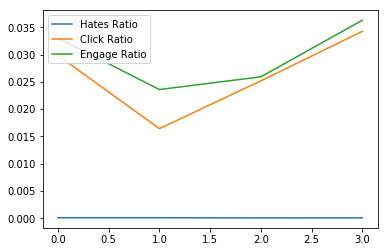

In [73]:
#Plotting the ratios
plt.plot(hatesratio['Value'])
plt.plot(clickratio['Value'])
plt.plot(engageratio['Value'])
plt.legend(['Hates Ratio', 'Click Ratio', 'Engage Ratio'], loc='upper left')
plt.show()

In [74]:
hatesratio = hatesratio.sort_values(ascending=False , by= 'Value')

print(hatesratio)

            Ratio         Type     Value
1  Negative Ratio        Photo  0.000080
0  Negative Ratio         Link  0.000079
3  Negative Ratio        Video  0.000049
2  Negative Ratio  SharedVideo  0.000046


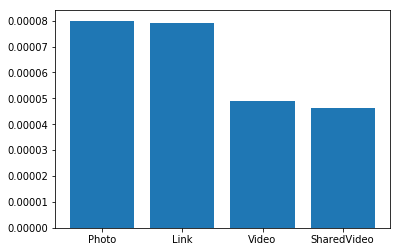

In [75]:
plt.bar(np.arange(len(hatesratio['Type'])),hatesratio['Value'].values)
plt.xticks(np.arange(len(hatesratio['Type'])), hatesratio['Type'])
plt.show()

In [76]:
clickratio = clickratio.sort_values(ascending=False , by= 'Value')

print(clickratio)

         Ratio         Type     Value
3  Click Ratio        Video  0.034253
0  Click Ratio         Link  0.029829
2  Click Ratio  SharedVideo  0.025172
1  Click Ratio        Photo  0.016421


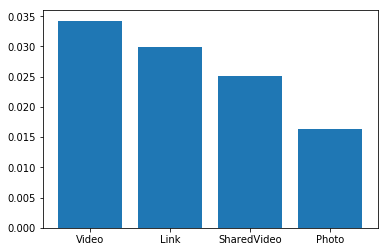

In [77]:
plt.bar(np.arange(len(clickratio['Type'])),clickratio['Value'].values)
plt.xticks(np.arange(len(clickratio['Type'])), clickratio['Type'])
plt.show()

In [78]:
engageratio = engageratio.sort_values(ascending=False , by= 'Value')

print(engageratio)

          Ratio         Type     Value
3  Engage Ratio        Video  0.036283
0  Engage Ratio         Link  0.033043
2  Engage Ratio  SharedVideo  0.025911
1  Engage Ratio        Photo  0.023580


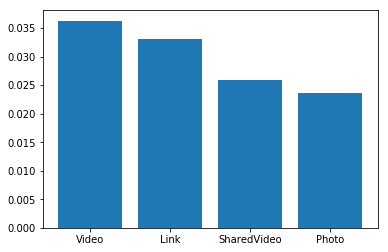

In [79]:
plt.bar(np.arange(len(engageratio['Type'])),engageratio['Value'].values)
plt.xticks(np.arange(len(engageratio['Type'])), engageratio['Type'])
plt.show()

In [80]:
topicn = facebook.groupby(['topics'])

In [81]:
hatesratio1 = topicn['negative_ratio'].mean()
 
hatesratio1

hatesratio1 = pd.DataFrame({'Topic': hatesratio1.index,'Value' : hatesratio1.values, 'Ratio' :'Negative Ratio'})

In [82]:
engageratio1 = topicn['engage_ratio'].mean()
engageratio1 = pd.DataFrame({'Topic':engageratio1.index,'Value' : engageratio1.values, 'Ratio' :'Engage Ratio'})

In [83]:
clickratio1 = topicn['click_ratio'].mean()
clickratio1 = pd.DataFrame({'Topic':clickratio1.index,'Value' : clickratio1.values, 'Ratio' :'Click Ratio'})

In [84]:
frames1 = [hatesratio1,engageratio1,clickratio1]
ratios1 = pd.concat(frames1)
print(ratios1)

            Ratio  Topic     Value
0  Negative Ratio      0  0.000076
1  Negative Ratio      1  0.000074
2  Negative Ratio      2  0.000073
3  Negative Ratio      3  0.000075
4  Negative Ratio      4  0.000074
0    Engage Ratio      0  0.031511
1    Engage Ratio      1  0.030264
2    Engage Ratio      2  0.026227
3    Engage Ratio      3  0.034802
4    Engage Ratio      4  0.034107
0     Click Ratio      0  0.028179
1     Click Ratio      1  0.026468
2     Click Ratio      2  0.022829
3     Click Ratio      3  0.031341
4     Click Ratio      4  0.030224


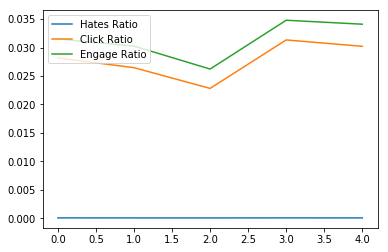

In [85]:
plt.plot(hatesratio1['Value'])
plt.plot(clickratio1['Value'])
plt.plot(engageratio1['Value'])
plt.legend(['Hates Ratio', 'Click Ratio', 'Engage Ratio'], loc='upper left')
plt.show()

In [86]:
hatesratio1 = hatesratio1.sort_values(ascending=False , by= 'Value')
print(hatesratio1)

            Ratio  Topic     Value
0  Negative Ratio      0  0.000076
3  Negative Ratio      3  0.000075
4  Negative Ratio      4  0.000074
1  Negative Ratio      1  0.000074
2  Negative Ratio      2  0.000073


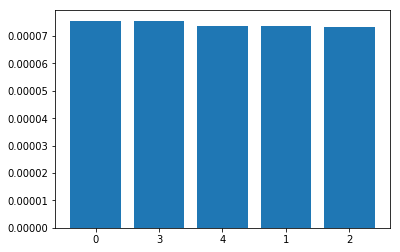

In [87]:
plt.bar(np.arange(len(hatesratio1['Topic'])),hatesratio1['Value'].values)
plt.xticks(np.arange(len(hatesratio1['Topic'])), hatesratio1['Topic'])
plt.show()

In [88]:
clickratio1 = clickratio1.sort_values(ascending=False , by= 'Value')

print(clickratio1)

         Ratio  Topic     Value
3  Click Ratio      3  0.031341
4  Click Ratio      4  0.030224
0  Click Ratio      0  0.028179
1  Click Ratio      1  0.026468
2  Click Ratio      2  0.022829


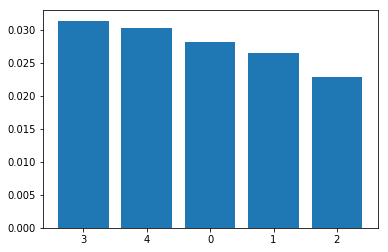

In [89]:
plt.bar(np.arange(len(clickratio1['Topic'])),clickratio1['Value'].values)
plt.xticks(np.arange(len(clickratio1['Topic'])), clickratio1['Topic'])
plt.show()

In [90]:
engageratio1 = engageratio1.sort_values(ascending=False , by= 'Value')

print(engageratio1)

          Ratio  Topic     Value
3  Engage Ratio      3  0.034802
4  Engage Ratio      4  0.034107
0  Engage Ratio      0  0.031511
1  Engage Ratio      1  0.030264
2  Engage Ratio      2  0.026227


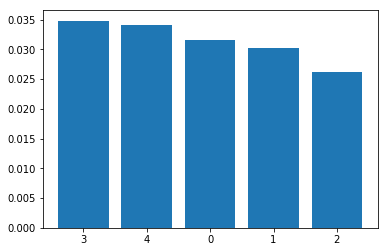

,Post Message,Type,Languages,Posted,Posted_time,Audience Targeting,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Post Total Impressions,...,Lifetime Paid Video Views5,Lifetime Average time video viewed,Lifetime Video length,topics,hourf,weekday,Uni,negative_ratio,engage_ratio,click_ratio
0,Sabes algo Hoy tenemos a todo el elenco de #El...,Video,NaN,2017-12-03 16:58:08,AFTERNOON,,693858,46676,50212,962062,...,22911,10742,3831509,2,16,6,96888,0.000175,0.134041,0.124195
1,"Estas son las s que compartió en sus redes, de...",Link,NaN,2017-11-30 23:30:00,EVENING,,250852,248457,0,379645,...,0,0,0,3,23,3,248457,0.000048,0.049952,0.048053
2,Así reaccionó Belinda.,Link,NaN,2017-11-30 23:00:00,EVENING,,41391,35081,0,58807,...,0,0,0,4,23,3,35081,0.000143,0.038112,0.034036
3,La mujer sobrevivió tras refugiarse en los esc...,Link,NaN,2017-11-30 22:30:00,EVENING,,403047,385183,0,582483,...,0,0,0,4,22,3,385183,0.000049,0.057518,0.056744
4,"""Soy vanidosa y sí quiero volver a sentirme be...",Link,NaN,2017-11-30 22:00:00,EVENING,,77349,76645,0,109708,...,0,0,0,4,22,3,76645,0.000117,0.041099,0.037197


In [91]:
plt.bar(np.arange(len(engageratio1['Topic'])),engageratio1['Value'].values)
plt.xticks(np.arange(len(engageratio1['Topic'])), engageratio1['Topic'])
plt.show()
facebook.head()

In [110]:
#Preparing the dataset for fitting into linear regression model.
from sklearn import preprocessing
from sklearn import linear_model
facebook_subset = facebook[['Type','weekday']]
facebook_uni = facebook['Uni']
le = preprocessing.LabelEncoder()
le.fit(facebook_subset['Type'])
facebook_subset['Type']=le.transform(facebook_subset['Type'])


/Users/Sara/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [111]:
#Fitting the linear regression model.

regr = linear_model.LinearRegression()
model= regr.fit(facebook_subset,facebook_uni)

In [114]:
#print regr
print(model.coef_)
print(model.intercept_)

[91461.96010225 15349.31534865]
74413.4950646804


In [95]:
facebook['likeclickratio'] =  facebook['Lifetime People who have liked your Page and engaged with your post']/facebook['Uni']

In [96]:
typen1= facebook.groupby(['Type'])
facebook['likeclickratio']

0      0.032409
1      0.047268
2      0.036544
3      0.055013
4      0.038385
5      0.012266
6      0.012728
7      0.021654
8      0.028561
9      0.029395
10     0.015122
11     0.017995
12     0.032586
13     0.017922
14     0.015547
15     0.039608
16     0.014813
17     0.012428
18     0.019958
19     0.053179
20     0.055225
21     0.029723
22     0.026235
23     0.032722
24     0.012767
25     0.005554
26     0.019491
27     0.057440
28     0.013937
29     0.006812
         ...   
470    0.009071
471    0.040301
472    0.009106
473    0.014335
474    0.012449
475    0.010477
476    0.006394
477    0.007609
478    0.060820
479    0.190686
480    0.036417
481    0.010976
482    0.091617
483    0.035264
484    0.017568
485    0.037517
486    0.034873
487    0.012305
488    0.023219
489    0.056686
490    0.028464
491    0.042842
492    0.030181
493    0.026906
494    0.019716
495    0.035854
496    0.010156
497    0.038476
498    0.019897
499    0.016440
Name: likeclickratio, Le

In [97]:
# Calculating like click ratio
likeclickratio = typen['likeclickratio'].mean()
likeclickratio



Type
Link           0.031419
Photo          0.021801
SharedVideo    0.024717
Video          0.025852
Name: likeclickratio, dtype: float64

In [98]:
likeclickratio = likeclickratio.sort_values(ascending=False )

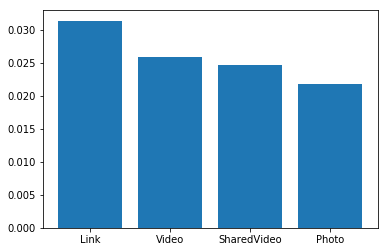

In [99]:
#Plot the likeclickratio
plt.bar(np.arange(len(likeclickratio)),likeclickratio.values)
plt.xticks(np.arange(len(likeclickratio)), likeclickratio.index)
plt.show()

In [100]:
#Subsetting the Type= Video
videofacebook = facebook.loc[facebook['Type'] == 'Video']

In [101]:
videofacebook['perwat'] = videofacebook['Lifetime Average time video viewed']/videofacebook['Lifetime Video length']

/Users/Sara/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


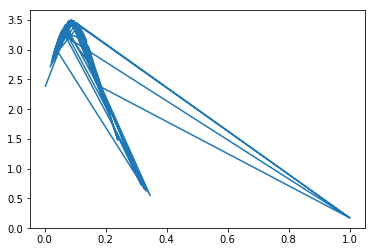

In [102]:
#Creating the density plot using gaussian kernel density estimation.
from scipy.stats import gaussian_kde
density = gaussian_kde(videofacebook['perwat'])

plt.plot(videofacebook['perwat'],density(videofacebook['perwat']))
plt.show()

In [103]:
videofacebook['perwat'].mean()

0.14742353769376323

In [104]:
videofacebook['totalviews'] = videofacebook['Lifetime Organic Video Views'] + videofacebook['Lifetime Paid Video Views']

/Users/Sara/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
#Calculating the watches.
videofacebook['perwatches'] = videofacebook['totalviews'] / videofacebook['Lifetime Post Total Reach']

/Users/Sara/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


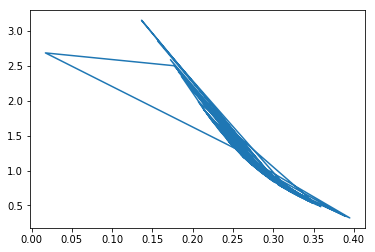

In [106]:
#Plotting the density
plt.plot(videofacebook['perwatches'],density(videofacebook['perwatches']))
plt.show()

In [107]:
#Calculating the mean
videofacebook['perwatches'].mean()

0.2641875379410317